### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6

#### Дисциплина: Интеллектуальный анализ данных

##### Студент: Матюхин Григорий Васильевич
##### Группа: НПИбд-01-21

## Москва 2024
***

### Вариант №23 

- Coil 1999 Competition Data Data Set 
    - Название файла: analysis.data 
    - Ссылка: http://archive.ics.uci.edu/ml/datasets/Coil+1999+Competition+Data 
- Класс: season (столбец No 1) 
- Метод обработки пропущенных значений – среднее значение признака 
- Метод нормализации признаков – масштабирование на интервал [-1, 1] 
- Алгоритм снижения размерности данных – отбор на основе важности признаков (ExtraTreesClassifier) 
- Дополнительные базовые классификаторы: 
    - классификатор логистической регрессии с полиномиальной зависимостью (degree=2) 
    - классификатор LDA 
- Комбинированный классификатор: StackingClassifier 
- Ансамблевые классификаторы: RandomForestClassifier,  AdaBoostClassifier 
- Показатель качества модели – точность (precision) 

## 1. Загружаем датасет

In [1]:
import requests
import zipfile
import pandas as pd

fname = "coil+1999+competition+data.zip"

response = requests.get(f"https://archive.ics.uci.edu/static/public/118/{fname}")
with open(fname, mode="wb") as file:
    file.write(response.content)

dname = "coil"
with zipfile.ZipFile(fname, 'r') as zip_ref:
    zip_ref.extractall(dname)

numeric = [f"CC{i}" for i in range(1, 9)] + [f"AG{i}" for i in range(1, 8)]
categorical = ["season", "river_size", "fluid_velocity"]
feats = categorical + numeric

coil = pd.read_csv(f"{dname}/analysis.data", names=feats)
coil

,season,river_size,fluid_velocity,CC1,CC2,CC3,CC4,CC5,CC6,CC7,CC8,AG1,AG2,AG3,AG4,AG5,AG6,AG7
0,winter,small_,medium,8.00000,9.80000,60.80000,6.23800,578.00000,105.00000,170.00000,50.00000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small_,medium,8.35000,8.00000,57.75000,1.28800,370.00000,428.75000,558.75000,1.30000,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small_,medium,8.10000,11.40000,40.02000,5.33000,346.66699,125.66700,187.05701,15.60000,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small_,medium,8.07000,4.80000,77.36400,2.30200,98.18200,61.18200,138.70000,1.40000,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small_,medium,8.06000,9.00000,55.35000,10.41600,233.70000,58.22200,97.58000,10.50000,9.2,2.9,7.5,0.0,7.5,4.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,autumn,large_,medium,8.40000,8.40000,17.37500,3.83300,83.75000,53.62500,79.75000,2.33800,12.7,21.7,5.6,0.0,1.0,0.0,0.0
196,spring,large_,medium,8.30000,10.60000,14.32000,3.20000,125.33300,35.33300,75.90400,4.66700,18.0,7.0,1.7,0.0,4.8,10.3,1.0
197,autumn,large_,medium,8.20000,7.00000,139.98900,2.97800,60.11000,78.33300,140.22000,31.73800,0.0,15.9,2.4,1.0,0.0,0.0,0.0
198,winter,large_,medium,8.00000,7.60000,XXXXXXX,XXXXXXX,XXXXXXX,XXXXXXX,XXXXXXX,XXXXXXX,0.0,12.5,3.7,1.0,0.0,0.0,4.9


In [2]:
CLS="season"

## 2. Предобработка данных

In [3]:
coil[CLS].unique()

array(['winter', 'spring', 'autumn', 'summer'], dtype=object)

In [4]:
import numpy as np

In [5]:
coil = coil.replace("XXXXXXX", np.nan)
for f in numeric:
    coil[f] = coil[f].apply(lambda s: s if not isinstance(s, str) else ".".join(s.split('.')[:2])).apply(pd.to_numeric)

coil

,season,river_size,fluid_velocity,CC1,CC2,CC3,CC4,CC5,CC6,CC7,CC8,AG1,AG2,AG3,AG4,AG5,AG6,AG7
0,winter,small_,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small_,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.300,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small_,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.600,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small_,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.400,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small_,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.500,9.2,2.9,7.5,0.0,7.5,4.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,autumn,large_,medium,8.40,8.4,17.375,3.833,83.75000,53.625,79.75000,2.338,12.7,21.7,5.6,0.0,1.0,0.0,0.0
196,spring,large_,medium,8.30,10.6,14.320,3.200,125.33300,35.333,75.90400,4.667,18.0,7.0,1.7,0.0,4.8,10.3,1.0
197,autumn,large_,medium,8.20,7.0,139.989,2.978,60.11000,78.333,140.22000,31.738,0.0,15.9,2.4,1.0,0.0,0.0,0.0
198,winter,large_,medium,8.00,7.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.5,3.7,1.0,0.0,0.0,4.9


In [6]:
for f in coil.keys():
    if bool(coil[f].notna().all()):
        print(f"Feat {f} is fine.")
    else:
        print(f"Feature {f} has NaNs. Replacing with mean.")
        coil[f] = coil[f].fillna(coil[f].mean())

Feat season is fine.
Feat river_size is fine.
Feat fluid_velocity is fine.
Feature CC1 has NaNs. Replacing with mean.
Feature CC2 has NaNs. Replacing with mean.
Feature CC3 has NaNs. Replacing with mean.
Feature CC4 has NaNs. Replacing with mean.
Feature CC5 has NaNs. Replacing with mean.
Feature CC6 has NaNs. Replacing with mean.
Feature CC7 has NaNs. Replacing with mean.
Feature CC8 has NaNs. Replacing with mean.
Feat AG1 is fine.
Feat AG2 is fine.
Feat AG3 is fine.
Feat AG4 is fine.
Feat AG5 is fine.
Feat AG6 is fine.
Feature AG7 has NaNs. Replacing with mean.


In [7]:
from sklearn.preprocessing import LabelEncoder
encoders = []
for k in categorical:
    encoder = LabelEncoder()
    coil[k] = encoder.fit_transform(coil[k])
    encoders.append(encoder)

coil

,season,river_size,fluid_velocity,CC1,CC2,CC3,CC4,CC5,CC6,CC7,CC8,AG1,AG2,AG3,AG4,AG5,AG6,AG7
0,3,2,2,8.00,9.8,60.800000,6.238000,578.000000,105.000000,170.000000,50.000000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,1,2,2,8.35,8.0,57.750000,1.288000,370.000000,428.750000,558.750000,1.300000,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,0,2,2,8.10,11.4,40.020000,5.330000,346.666990,125.667000,187.057010,15.600000,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,1,2,2,8.07,4.8,77.364000,2.302000,98.182000,61.182000,138.700000,1.400000,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,0,2,2,8.06,9.0,55.350000,10.416000,233.700000,58.222000,97.580000,10.500000,9.2,2.9,7.5,0.0,7.5,4.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,2,8.40,8.4,17.375000,3.833000,83.750000,53.625000,79.750000,2.338000,12.7,21.7,5.6,0.0,1.0,0.0,0.0
196,1,0,2,8.30,10.6,14.320000,3.200000,125.333000,35.333000,75.904000,4.667000,18.0,7.0,1.7,0.0,4.8,10.3,1.0
197,0,0,2,8.20,7.0,139.989000,2.978000,60.110000,78.333000,140.220000,31.738000,0.0,15.9,2.4,1.0,0.0,0.0,0.0
198,3,0,2,8.00,7.6,43.636279,3.282389,154.447197,83.325566,111.550601,13.540729,0.0,12.5,3.7,1.0,0.0,0.0,4.9


## 3. Снижение размерности

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier()

X = coil.drop(CLS, axis=1)
y = coil[CLS]

et_clf.fit(X, y);

importances = et_clf.feature_importances_
importances

array([0.04188461, 0.03826932, 0.05899398, 0.09218866, 0.05427805,
       0.06560381, 0.06068876, 0.06046958, 0.0686325 , 0.06299991,
       0.0622353 , 0.0555976 , 0.06903663, 0.04923379, 0.05253051,
       0.06040458, 0.0469524 ])

In [9]:
feats = list(map(lambda i: i[1], list(reversed(sorted(zip(importances, filter(lambda i: i != CLS, feats)))))[:4]))
feats

['CC2', 'AG3', 'CC7', 'CC4']

In [10]:
coil = coil[[CLS] + feats]
coil

,season,CC2,AG3,CC7,CC4
0,3,9.8,0.0,170.000000,6.238000
1,1,8.0,4.8,558.750000,1.288000
2,0,11.4,1.9,187.057010,5.330000
3,1,4.8,18.9,138.700000,2.302000
4,0,9.0,7.5,97.580000,10.416000
...,...,...,...,...,...
195,0,8.4,5.6,79.750000,3.833000
196,1,10.6,1.7,75.904000,3.200000
197,0,7.0,2.4,140.220000,2.978000
198,3,7.6,3.7,111.550601,3.282389


## 4. Нормализация данных

In [11]:
from sklearn.preprocessing import MaxAbsScaler
abs_scaler = MaxAbsScaler()
coil[feats] = abs_scaler.fit_transform(coil[feats])
coil

/tmp/ipykernel_3329818/3282261371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coil[feats] = abs_scaler.fit_transform(coil[feats])


,season,CC2,AG3,CC7,CC4
0,3,0.731343,0.000000,0.304251,0.136648
1,1,0.597015,0.107623,1.000000,0.028215
2,0,0.850746,0.042601,0.334778,0.116758
3,1,0.358209,0.423767,0.248233,0.050427
4,0,0.671642,0.168161,0.174640,0.228171
...,...,...,...,...,...
195,0,0.626866,0.125561,0.142729,0.083965
196,1,0.791045,0.038117,0.135846,0.070099
197,0,0.522388,0.053812,0.250953,0.065235
198,3,0.567164,0.082960,0.199643,0.071903


## 5. Визуализация

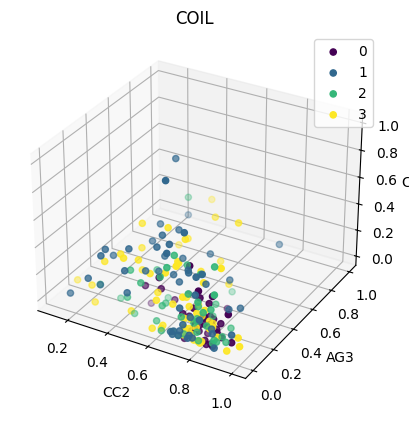

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cols = feats[:3]

for k in set(coil[CLS]):
    subset = coil[coil[CLS] == k]
    ax.scatter(subset[cols[0]],
        subset[cols[1]],
        subset[cols[2]],
        label=k, c=[k for _ in subset[cols[0]]],
        vmin=min(coil[CLS]),
        vmax=max(coil[CLS]),
    )

ax.set_xlabel(cols[0])
ax.set_ylabel(cols[1])
ax.set_zlabel(cols[2])
ax.legend()
plt.title("COIL")
plt.show()

## 6. Классификация

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(coil[feats[:2]], coil[CLS], test_size=0.2)

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [15]:
train_ok = (dtree.predict(X_train) == y_train).sum()
test_ok = (dtree.predict(X_test) == y_test).sum()
print("Train OK:", train_ok, "/", len(y_train), "=", train_ok/len(y_train))
print("Test  OK:", test_ok, "/", len(y_test), "=", test_ok/len(y_test))

Train OK: 79 / 160 = 0.49375
Test  OK: 14 / 40 = 0.35


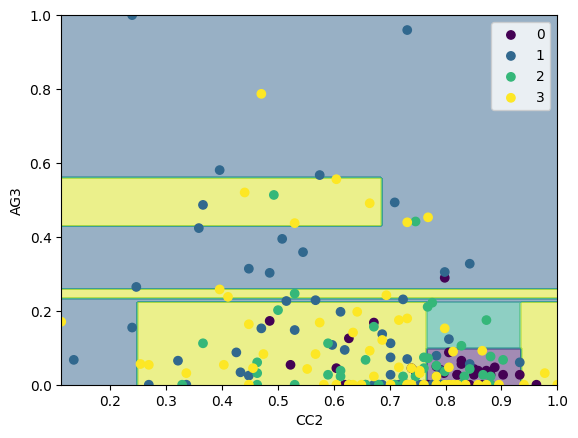

In [16]:
import pandas as pd
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

fig = plt.figure()
ax = fig.add_subplot()

cols = feats[:2]

xx0, xx1 = np.meshgrid(np.linspace(min(coil[cols[0]]), max(coil[cols[0]]), 200), np.linspace(min(coil[cols[1]]), max(coil[cols[1]]), 200))

Xmeshgrid = pd.DataFrame(np.array([xx0.ravel(), xx1.ravel()]).T, columns=[cols[0], cols[1]])

response = dtree.predict(Xmeshgrid)
response = response.reshape(xx0.shape)

DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=response, xlabel=cols[0], ylabel=cols[1]).plot(ax=ax, cmap='viridis', alpha=0.5)

for k in set(coil[CLS]):
    subset = coil[coil[CLS] == k]
    ax.scatter(subset[cols[0]], subset[cols[1]], c=[k for _ in subset[cols[0]]], vmin=min(coil[CLS]), vmax=max(coil[CLS]), label=k)

ax.legend()

## 7. Дополнительные классификаторы

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

train_ok = (lr.predict(X_train) == y_train).sum()
test_ok = (lr.predict(X_test) == y_test).sum()
print("Train OK:", train_ok, "/", len(y_train), "=", train_ok/len(y_train))
print("Test  OK:", test_ok, "/", len(y_test), "=", test_ok/len(y_test))

Train OK: 58 / 160 = 0.3625
Test  OK: 9 / 40 = 0.225


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

train_ok = (lda.predict(X_train) == y_train).sum()
test_ok = (lda.predict(X_test) == y_test).sum()
print("Train OK:", train_ok, "/", len(y_train), "=", train_ok/len(y_train))
print("Test  OK:", test_ok, "/", len(y_test), "=", test_ok/len(y_test))

Train OK: 58 / 160 = 0.3625
Test  OK: 9 / 40 = 0.225


In [19]:
from sklearn.ensemble import StackingClassifier

stck = StackingClassifier([
    ("decision-tree", dtree),
    ("log-reg", lr),
    ("lda", lda)
])

stck.fit(X_train, y_train)

train_ok = (stck.predict(X_train) == y_train).sum()
test_ok = (stck.predict(X_test) == y_test).sum()
print("Train OK:", train_ok, "/", len(y_train), "=", train_ok/len(y_train))
print("Test  OK:", test_ok, "/", len(y_test), "=", test_ok/len(y_test))

Train OK: 40 / 160 = 0.25
Test  OK: 10 / 40 = 0.25


In [20]:
from sklearn.metrics import precision_score

print("precision_score:")
print("Decision Tree        :", precision_score(y_test, dtree.predict(X_test), average='weighted'))
print("Logistic Regression  :", precision_score(y_test, lr.predict(X_test), average='weighted'))
print("Linear Discrimination:", precision_score(y_test, lda.predict(X_test), average='weighted'))
print("Stacking             :", precision_score(y_test, stck.predict(X_test), average='weighted'))

precision_score:
Decision Tree        : 0.371078431372549
Logistic Regression  : 0.2711711711711712
Linear Discrimination: 0.31725806451612903
Stacking             : 0.3932432432432432


/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## 8. Ансамблевые классификаторы

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

train_ok = (rf.predict(X_train) == y_train).sum()
test_ok = (rf.predict(X_test) == y_test).sum()
print("Train OK:", train_ok, "/", len(y_train), "=", train_ok/len(y_train))
print("Test  OK:", test_ok, "/", len(y_test), "=", test_ok/len(y_test))

Train OK: 149 / 160 = 0.93125
Test  OK: 8 / 40 = 0.2


In [22]:
# gradient boosting
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=1000)
ada.fit(X_train, y_train)

train_ok = (ada.predict(X_train) == y_train).sum()
test_ok = (ada.predict(X_test) == y_test).sum()
print("Train OK:", train_ok, "/", len(y_train), "=", train_ok/len(y_train))
print("Test  OK:", test_ok, "/", len(y_test), "=", test_ok/len(y_test))

/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train OK: 68 / 160 = 0.425
Test  OK: 11 / 40 = 0.275


In [23]:
from sklearn.metrics import precision_score

print("precision_score:")
print("Decision Tree        :", precision_score(y_test, dtree.predict(X_test), average='weighted'))
print("Logistic Regression  :", precision_score(y_test, lr.predict(X_test), average='weighted'))
print("Linear Discrimination:", precision_score(y_test, lda.predict(X_test), average='weighted'))
print("Stacking             :", precision_score(y_test, stck.predict(X_test), average='weighted'))
print("Random Forest        :", precision_score(y_test, rf.predict(X_test), average='weighted'))
print("Ada Boost            :", precision_score(y_test, ada.predict(X_test), average='weighted'))

precision_score:
Decision Tree        : 0.371078431372549
Logistic Regression  : 0.2711711711711712
Linear Discrimination: 0.31725806451612903
Stacking             : 0.3932432432432432
Random Forest        : 0.21875
Ada Boost            : 0.3327380952380952


/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## 9. Границы принятия решения для ансамблевых классификаторов

Text(0.5, 1.0, 'Random Forest')

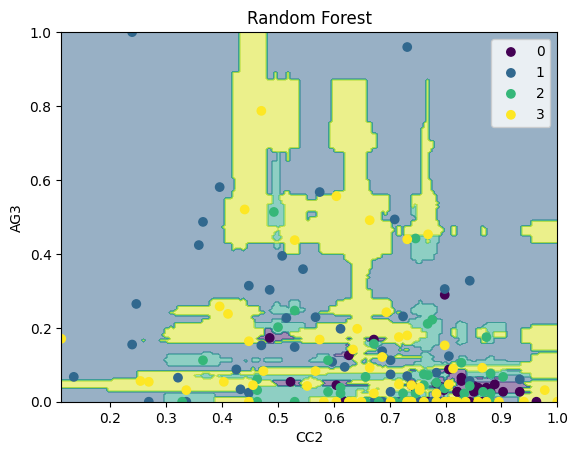

In [24]:
import pandas as pd
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

fig = plt.figure()
ax = fig.add_subplot()

cols = feats[:2]

xx0, xx1 = np.meshgrid(np.linspace(min(coil[cols[0]]), max(coil[cols[0]]), 200), np.linspace(min(coil[cols[1]]), max(coil[cols[1]]), 200))

Xmeshgrid = pd.DataFrame(np.array([xx0.ravel(), xx1.ravel()]).T, columns=[cols[0], cols[1]])

response = rf.predict(Xmeshgrid)
response = response.reshape(xx0.shape)

DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=response, xlabel=cols[0], ylabel=cols[1]).plot(ax=ax, cmap='viridis', alpha=0.5)

for k in set(coil[CLS]):
    subset = coil[coil[CLS] == k]
    ax.scatter(subset[cols[0]], subset[cols[1]], c=[k for _ in subset[cols[0]]], vmin=min(coil[CLS]), vmax=max(coil[CLS]), label=k)

ax.legend()
plt.title("Random Forest")

Text(0.5, 1.0, 'Ada Boost')

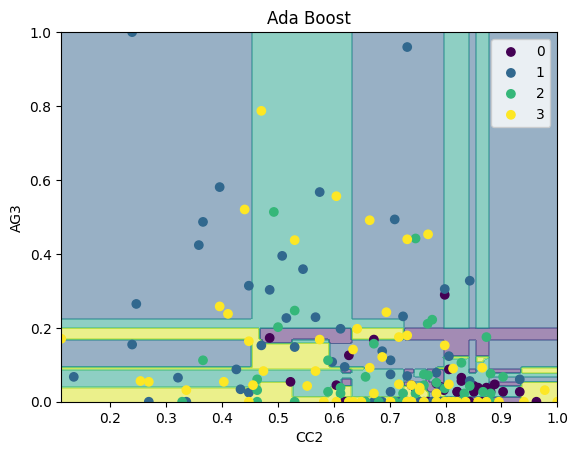

In [25]:
import pandas as pd
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

fig = plt.figure()
ax = fig.add_subplot()

cols = feats[:2]

xx0, xx1 = np.meshgrid(np.linspace(min(coil[cols[0]]), max(coil[cols[0]]), 200), np.linspace(min(coil[cols[1]]), max(coil[cols[1]]), 200))

Xmeshgrid = pd.DataFrame(np.array([xx0.ravel(), xx1.ravel()]).T, columns=[cols[0], cols[1]])

response = ada.predict(Xmeshgrid)
response = response.reshape(xx0.shape)

DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=response, xlabel=cols[0], ylabel=cols[1]).plot(ax=ax, cmap='viridis', alpha=0.5)

for k in set(coil[CLS]):
    subset = coil[coil[CLS] == k]
    ax.scatter(subset[cols[0]], subset[cols[1]], c=[k for _ in subset[cols[0]]], vmin=min(coil[CLS]), vmax=max(coil[CLS]), label=k)

ax.legend()
plt.title("Ada Boost")